## Python for Data Analysis - C02

### 3. Baby Names (2000 - 2010)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names2010 = pd.read_csv('data/names/yob2010.txt', names=['name', 'sex', 'births'])
names2010.head()

,name,sex,births
0,Isabella,F,22731
1,Sophia,F,20477
2,Emma,F,17179
3,Olivia,F,16860
4,Ava,F,15300


In [3]:
names2010.shape

(33838, 3)

In [4]:
names2010.groupby('sex').births.sum()

sex
F    1759010
M    1898382
Name: births, dtype: int64

### 년도별 데이터 합치기

In [5]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

In [6]:
for year in years:
    path = 'data/names/yob%d.txt' % year
    df = pd.read_csv(path, names=columns)

    df['year'] = year
    pieces.append(df)

In [7]:
# 하나의 dataframe으로 취합. 
names = pd.concat(pieces, ignore_index=True)  # ignore_index : 원래의 행순서 상관없음.
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [8]:
names.tail()

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [9]:
total = names.groupby(['year', 'sex']).births.sum()
total.head(10)

year  sex
1880  F       90993
      M      110493
1881  F       91955
      M      100748
1882  F      107851
      M      113687
1883  F      112322
      M      104632
1884  F      129021
      M      114445
Name: births, dtype: int64

In [10]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


### 성별, 연도별 출생 트렌드

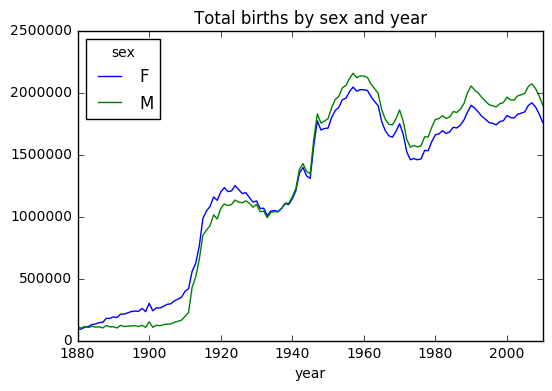

In [11]:
plt.figure()
total_births.plot(title='Total births by sex and year')

In [12]:
# 년도별 성별 그룹핑

In [13]:
ysGrouped = names.groupby(['year', 'sex'])
# z.groups
for name, group in ysGrouped:
    print(name)

(1880, 'F')
(1880, 'M')
(1881, 'F')
(1881, 'M')
(1882, 'F')
(1882, 'M')
(1883, 'F')
(1883, 'M')
(1884, 'F')
(1884, 'M')
(1885, 'F')
(1885, 'M')
(1886, 'F')
(1886, 'M')
(1887, 'F')
(1887, 'M')
(1888, 'F')
(1888, 'M')
(1889, 'F')
(1889, 'M')
(1890, 'F')
(1890, 'M')
(1891, 'F')
(1891, 'M')
(1892, 'F')
(1892, 'M')
(1893, 'F')
(1893, 'M')
(1894, 'F')
(1894, 'M')
(1895, 'F')
(1895, 'M')
(1896, 'F')
(1896, 'M')
(1897, 'F')
(1897, 'M')
(1898, 'F')
(1898, 'M')
(1899, 'F')
(1899, 'M')
(1900, 'F')
(1900, 'M')
(1901, 'F')
(1901, 'M')
(1902, 'F')
(1902, 'M')
(1903, 'F')
(1903, 'M')
(1904, 'F')
(1904, 'M')
(1905, 'F')
(1905, 'M')
(1906, 'F')
(1906, 'M')
(1907, 'F')
(1907, 'M')
(1908, 'F')
(1908, 'M')
(1909, 'F')
(1909, 'M')
(1910, 'F')
(1910, 'M')
(1911, 'F')
(1911, 'M')
(1912, 'F')
(1912, 'M')
(1913, 'F')
(1913, 'M')
(1914, 'F')
(1914, 'M')
(1915, 'F')
(1915, 'M')
(1916, 'F')
(1916, 'M')
(1917, 'F')
(1917, 'M')
(1918, 'F')
(1918, 'M')
(1919, 'F')
(1919, 'M')
(1920, 'F')
(1920, 'M')
(1921, 'F')
(192

In [14]:
ysGrouped.get_group((2000,'F')).head()   # 특정 그룹에 속한 데이터

,name,sex,births,year
1332172,Emily,F,25949,2000
1332173,Hannah,F,23066,2000
1332174,Madison,F,19965,2000
1332175,Ashley,F,17991,2000
1332176,Sarah,F,17677,2000


In [15]:
# 각 이름이 각 그룹에서 차지하는 비율

In [16]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

In [17]:
names = ysGrouped.apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [18]:
# 그룹별로 비율의 합이 1이 맞는지 확인

In [19]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [20]:
# 그룹별로 사용 빈도수가 높은 이름 1000 개 추출

In [21]:
def get_top1000(group):
    #group = group[group['prop'] > 0.01]  # 사용 비율로 필터링.
    return group.sort_values(by='births', ascending=False)[:1000]

In [22]:
top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000.index = np.arange(len(top1000))
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [23]:
top1000.tail()

,name,sex,births,year,prop
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102
261876,Maxton,M,193,2010,0.000102


### 이름 유행 분석

In [24]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [25]:
girls.shape

(130880, 5)

In [26]:
girls.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [27]:
# pandas groupby --> dataframe --> sort

In [28]:
girlsRating = pd.DataFrame(girls.groupby('name').births.sum())
girlsRating.sort_values(by='births', ascending=False).head()

,births
name,
Mary,4103935
Patricia,1568737
Elizabeth,1561874
Jennifer,1454725
Linda,1448771


In [29]:
# 각 이름의 년도별 사용 트렌드

In [30]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.tail()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN
2009,1265.0,4352.0,270.0,7936.0,NaN,NaN,296.0,NaN,307.0,369.0,...,NaN,5120.0,3981.0,496.0,NaN,NaN,NaN,NaN,NaN,NaN
2010,448.0,4628.0,438.0,7374.0,226.0,NaN,277.0,NaN,295.0,324.0,...,NaN,6200.0,5164.0,504.0,NaN,NaN,NaN,NaN,NaN,258.0


In [31]:
# 여자 이름 상위 5개

In [32]:
subset = total_births[['Mary', 'Patricia', 'Elizabeth', 'Jennifer', 'Linda']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1329dd7f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x13aab04a8>], dtype=object)

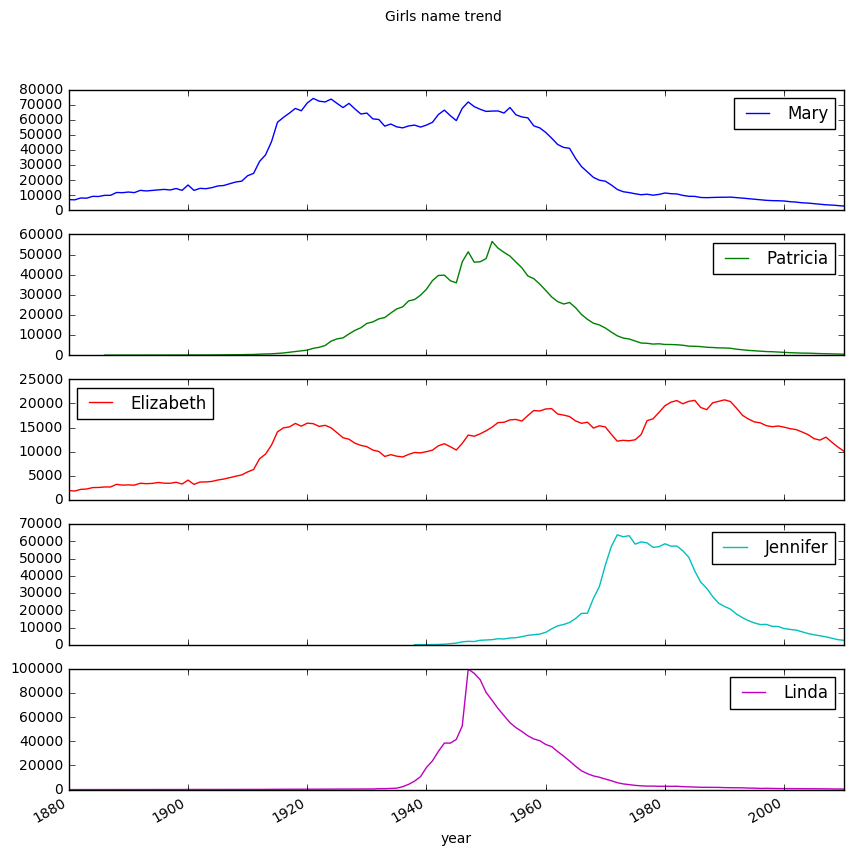

In [46]:
subset.plot(subplots=True, figsize=(10,10), grid=False, title='Girls name trend')

In [34]:
# 상위 이름 1000개가 전체에서 차지하는 비율

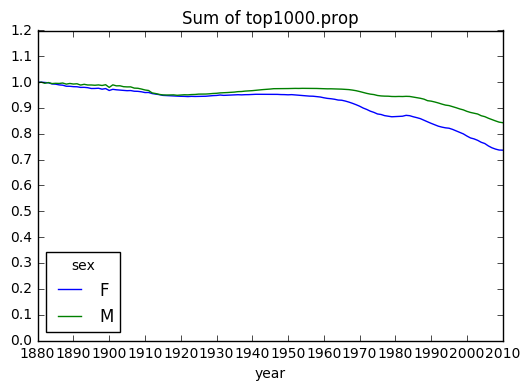

In [35]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of top1000.prop',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [36]:
# 년도별 사용하는 이름 갯수 - 점점 더 다양한 이름을 사용하는 경향

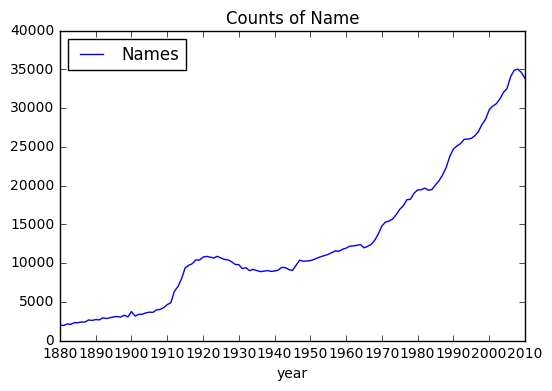

In [37]:
nameCounts = pd.DataFrame(names.groupby('year').size())
nameCounts.columns = ['Names']
nameCounts.plot(title='Counts of Name', yticks=np.linspace(0, 40000, 9), xticks=range(1880, 2020, 10))

In [ ]:
# 남녀별 사용하는 이름의 다양성 비교 (전체의 50% 차지하는 이름의 갯수)

In [50]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)    # 그룹별 prop 기준 정렬
    return group.prop.cumsum().values.searchsorted(q) + 1   # prop 누계가 0.5인 index 찾기

In [55]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')   # 결과를 표로 재배치
diversity.tail()

sex,F,M
year,,
2006,209,99
2007,223,103
2008,234,109
2009,241,114
2010,246,117


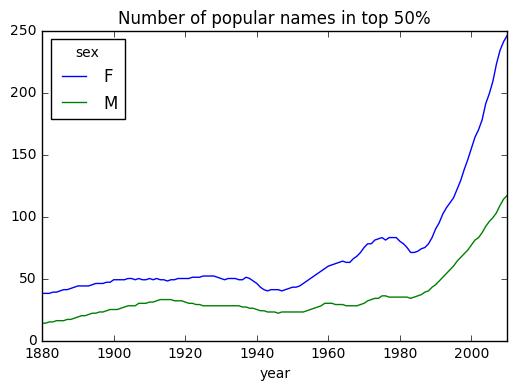

In [56]:
diversity.plot(title="Number of popular names in top 50%")
# 여자 이름이 남자 이름보다 더 다양. 시간이 흐를수록 다양성 높아짐.